In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# import data
filename = 'Fig5C_data.xlsx'
xl = pd.ExcelFile(filename)

gfp = xl.parse('fig5C_clean', index_col = 0, header = 0)
gfp.insert(0, 'sample_name', np.array(['suppressed','resting','enriched','detected','hyper']))
gfp

,sample_name,col1,col2,col3,col4,col5
cm+atc,suppressed,2,6,6,10,11
cm,resting,333,356,307,472,518
cm+kan,enriched,292,246,502,697,312
cm+ttr,detected,1277,756,844,959,921
cm+kan+ttr,hyper,1203,917,1036,849,998


In [3]:
gfp_long = pd.melt(gfp, id_vars='sample_name', value_vars=['col1', 'col2', 'col3', 'col4', 'col5'], value_name = 'GFP')
gfp_long.rename(columns = {'variable':'replicate'}, inplace = True)
gfp_long

,sample_name,replicate,GFP
0,suppressed,col1,2
1,resting,col1,333
2,enriched,col1,292
3,detected,col1,1277
4,hyper,col1,1203
5,suppressed,col2,6
6,resting,col2,356
7,enriched,col2,246
8,detected,col2,756
9,hyper,col2,917


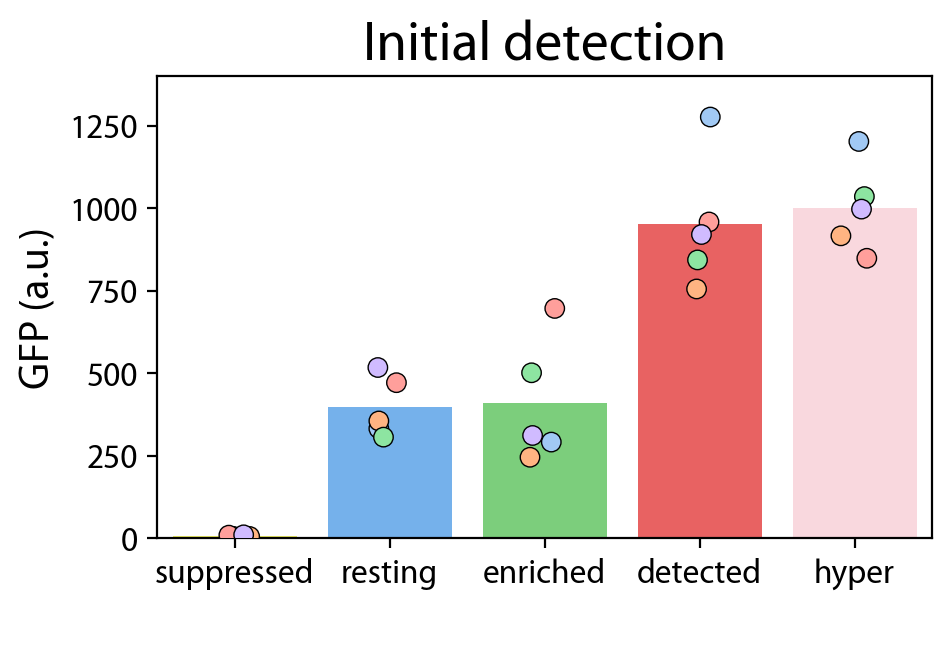

In [4]:
fig, ax = plt.subplots(figsize=(5, 3), dpi = 200)
plt.rcParams['font.sans-serif'] = "Myriad Pro"

# Draw the bar chart
b = sns.barplot(data=gfp_long, x="sample_name", y="GFP", hue = 'sample_name',
    alpha=0.7, errorbar=None,palette = ['yellow', 'dodgerblue', 'limegreen', 'red', 'pink'],ax = ax)

# Draw the stripplot
sns.stripplot(data=gfp_long, x="sample_name", y="GFP", 
    hue="replicate", edgecolor="black", linewidth=.5,s = 7,ax=ax,palette = sns.color_palette('pastel', 5))

# Remove the old legend
ax.legend_.remove()


b.axes.set_title("Initial detection",fontsize=20)
b.set_xlabel(" ",fontsize=15)
b.set_ylabel("GFP (a.u.)",fontsize=15)
b.tick_params(labelsize=5)
b.tick_params(axis='both', which='major', labelsize=12)
plt.ylim([0, 1400])

plt.xticks(range(5), ['suppressed', 'resting', 'enriched', 'detected', 'hyper'], fontsize=12)
plt.savefig('fig5c.svg', format='svg',bbox_inches='tight', pad_inches=0.1)


plt.show()
